In [513]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
import scipy.stats as sts
import seaborn as sns
from scipy import stats
from scipy.stats import linregress

In [514]:
#age data ram from csv with drop duplicates clean
age_raw = 'Resources/Age_Data.csv'
age_data = pd.read_csv(age_raw)
age_data.drop_duplicates(inplace=True)
age_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16236 entries, 0 to 16235
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       16236 non-null  int64 
 1   Year             16236 non-null  int64 
 2   City             16236 non-null  object
 3   Age Range        16236 non-null  object
 4   Number in Range  16236 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 761.1+ KB


In [515]:
#raw income data
income_raw = 'Resources/Income_data.csv'
income_data = pd.read_csv(income_raw)
income_data = income_data[['Year', 'City', 'Median Income']]
print(income_data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476 entries, 0 to 1475
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           1476 non-null   int64 
 1   City           1476 non-null   object
 2   Median Income  1476 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 34.7+ KB
None


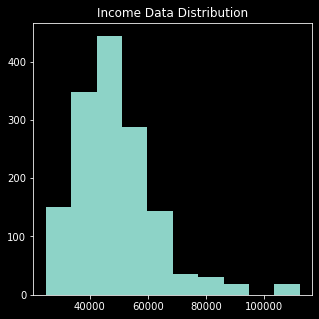

In [516]:
#look at distribution of income data
plt.rcParams['figure.figsize']=(5,5)
plt.hist(income_data['Median Income'])
plt.title('Income Data Distribution')
plt.show()

In [517]:
#import raw avacado data and clean, plus join to city data to get City, State Column
avacado_raw = 'Resources/clean_avocado.csv'
avacado_data = pd.read_csv(avacado_raw)
avacado_data = avacado_data.rename(columns={'region':'City'})
city_data = 'Resources/City Geo Join Table.xlsx'
city_join = pd.read_excel(city_data)
avacado_city = pd.merge(avacado_data, city_join, on='City', how='left')
avacado_city = avacado_city[['year', 'AveragePrice','City, State']].rename(columns={'City, State':'City', 'year':'Year'})
avacado_city

,Year,AveragePrice,City
0,2015,1.22,"Albany, NY"
1,2015,1.24,"Albany, NY"
2,2015,1.17,"Albany, NY"
3,2015,1.06,"Albany, NY"
4,2015,0.99,"Albany, NY"
...,...,...,...
18717,2019,0.96,"Tampa, FL"
18718,2019,1.23,"Tampa, FL"
18719,2019,1.26,"Tampa, FL"
18720,2019,1.24,"Tampa, FL"


In [518]:
print(avacado_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18722 entries, 0 to 18721
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18722 non-null  int64  
 1   Date          18722 non-null  object 
 2   AveragePrice  18722 non-null  float64
 3   Total Volume  18722 non-null  float64
 4   4046          18722 non-null  float64
 5   4225          18722 non-null  float64
 6   4770          18722 non-null  float64
 7   Total Bags    18722 non-null  float64
 8   Small Bags    18722 non-null  float64
 9   Large Bags    18722 non-null  float64
 10  XLarge Bags   18722 non-null  float64
 11  type          18722 non-null  object 
 12  year          18722 non-null  int64  
 13  City          18722 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 2.0+ MB
None


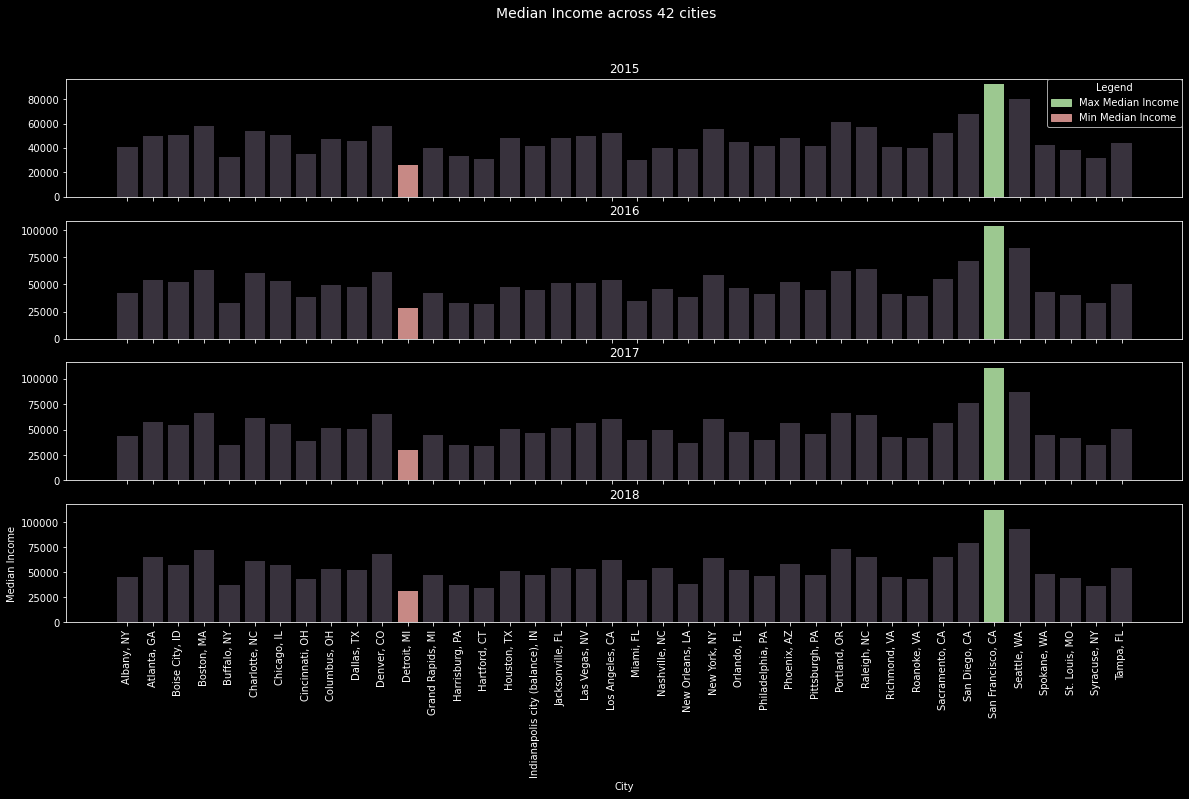

In [519]:
#plot of income data, highlighting max and min
import matplotlib.patches as mpatches

#setup Groupbys, max, and min
income_groupby = income_data.copy().loc[income_data['Year'] >= 2015]
income_groupby = income_groupby.groupby(['Year', 'City', 'Median Income']).sum().reset_index().pivot(index='City', columns='Year').reset_index()
income_groupby.columns = ['City', '2015','2016', '2017', '2018']

income_max = income_data.copy().loc[income_data['Year'] >= 2015]
income_max = income_max.drop_duplicates().groupby(['Year'])['Median Income'].max().reset_index()
income_max = pd.merge(income_max, income_data.copy(), on=['Year', 'Median Income'], how='left').drop_duplicates().pivot(index='City', columns='Year').reset_index()
income_max.columns = ['City', '2015','2016', '2017', '2018']

income_min = income_data.copy().loc[income_data['Year'] >= 2015]
income_min = income_min.drop_duplicates().groupby(['Year'])['Median Income'].min().reset_index()
income_min = pd.merge(income_min, income_data.copy(), on=['Year', 'Median Income'], how='left').drop_duplicates().pivot(index='City', columns='Year').reset_index()
income_min.columns = ['City', '2015','2016', '2017', '2018']

#make plot fig
plt.rcParams['figure.figsize']=(20,10)
#set axis
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
#plot axis
ax1.bar(income_groupby['City'], income_groupby['2015'], color='#71647A', alpha=.5)
ax1.bar(income_max['City'], income_max['2015'], color = '#9CC890')
ax1.bar(income_min['City'], income_min['2015'], color= '#C78985')
ax1.set_title('2015')

ax2.bar(income_groupby['City'], income_groupby['2016'], color='#71647A', alpha=.5)
ax2.bar(income_max['City'], income_max['2016'], color = '#9CC890')
ax2.bar(income_min['City'], income_min['2016'],color= '#C78985')
ax2.set_title('2016')

ax3.bar(income_groupby['City'], income_groupby['2017'], color='#71647A', alpha=.5)
ax3.bar(income_max['City'], income_max['2017'], color = '#9CC890')
ax3.bar(income_min['City'], income_min['2017'],color= '#C78985')
ax3.set_title('2017')

ax4.bar(income_groupby['City'], income_groupby['2018'], color='#71647A', alpha=.5)
ax4.bar(income_max['City'], income_max['2018'], color = '#9CC890')
ax4.bar(income_min['City'], income_min['2018'],color= '#C78985')
ax4.set_title('2018')

#legend, formatting, etc.
max_patch = mpatches.Patch(color='#9CC890', label='Max Median Income')
min_patch = mpatches.Patch(color='#C78985', label='Min Median Income')
ax1.legend(title='Legend', handles = [max_patch, min_patch], loc='upper right', fancybox=True, borderaxespad=0)

plt.ylabel('Median Income')
plt.xlabel('City')
plt.xticks( rotation=90)
plt.suptitle("Median Income across 42 cities", fontsize=14)


plt.show()

In [520]:
#clean of age data to get just Millenial and Other age group flag column for analysis
millennials = age_data.copy()
millennials['Millennials'] = np.where((millennials['Age Range'] == '18 to 24 Years') | (millennials['Age Range'] == '25 to 34 Years'), 'Millenial', 'Other')
millennials = millennials.loc[millennials["Year"] >= 2015]

millennials

,Unnamed: 0,Year,City,Age Range,Number in Range,Millennials
0,0,2018,"Albany, NY",18 to 24 Years,21091,Millenial
1,1,2018,"Albany, NY",75 Years & Over,5906,Other
2,2,2018,"Albany, NY",45 to 54 Years,10514,Other
3,3,2018,"Albany, NY",Under 5 Years,5491,Other
4,4,2018,"Albany, NY",65 to 74 Years,6670,Other
...,...,...,...,...,...,...
16209,16209,2015,"Tampa, FL",Under 5 Years,22686,Other
16210,16210,2015,"Tampa, FL",5 to 17 Years,57889,Other
16211,16211,2015,"Tampa, FL",45 to 54 Years,50313,Other
16212,16212,2015,"Tampa, FL",62 to 64 Years,10131,Other


In [645]:
#transformation of age data to count millenial data and calculate percentages
age_groupby = millennials.groupby(['Year', 'City', 'Millennials'])['Number in Range'].sum()
age_groupby = age_groupby.reset_index().pivot_table(index=['City', ], columns=['Year', 'Millennials'], values='Number in Range').reset_index()
age_groupby.columns = ['City', '2015 Millennials', '2015 Other','2016 Millennials', '2016 Other', '2017 Millennials', '2017 Other', '2018 Millennials', '2018 Other']

years = [2015, 2016, 2017, 2018]

for year in years:
    age_groupby['{} %'.format(year)] = (age_groupby['{} Millennials'.format(year)]/(age_groupby['{} Millennials'.format(year)]+age_groupby['{} Other'.format(year)]))
    # age_groupby['{} %'.format(year)] = age_groupby['{} %'.format(year)].map("{:,.1f}%".format)


age_groupby

,City,2015 Millennials,2015 Other,2016 Millennials,2016 Other,2017 Millennials,2017 Other,2018 Millennials,2018 Other,2015 %,2016 %,2017 %,2018 %
0,"Albany, NY",227772,363036,229644,360906,229002,361986,222252,365082,0.385526,0.388865,0.387490,0.378408
1,"Atlanta, GA",1900956,3665544,1946028,3724044,1989348,3846240,2070720,3906156,0.341499,0.343210,0.340899,0.346455
2,"Boise City, ID",338994,946182,343404,968658,346806,978348,350838,994962,0.263772,0.261728,0.261710,0.260691
3,"Boston, MA",1563882,2452932,1588302,2448738,1609842,2488248,1646658,2528898,0.389334,0.393432,0.392827,0.394357
4,"Buffalo, NY",458418,1089978,471624,1069824,480234,1071318,455544,1082388,0.296060,0.305962,0.309518,0.296206
5,"Charlotte, NC",1358214,3604512,1375536,3676638,1438044,3716268,1442820,3792216,0.273683,0.272266,0.278998,0.275608
6,"Chicago, IL",4898166,11425170,4845486,11384304,4891938,11406834,4838478,11397450,0.300071,0.298555,0.300142,0.298011
7,"Cincinnati, OH",569778,1221444,574272,1218540,583086,1224744,582360,1233330,0.318095,0.320319,0.322534,0.320738
8,"Columbus, OH",1645782,3448620,1657596,3518262,1697934,3593472,1739790,3635472,0.323057,0.320255,0.320885,0.323666
9,"Dallas, TX",2198568,5601924,2282286,5625366,2355684,5690934,2273364,5797092,0.281850,0.288617,0.292755,0.281690


In [647]:
#clip of % of population by Millennial with some style
age_clip = age_groupby[['City','2015 %', '2016 %', '2017 %', '2018 %' ]]
age_clip[['2015 %', '2016 %', '2017 %', '2018 %' ]] = age_clip[['2015 %', '2016 %', '2017 %', '2018 %']]
format_dict = {'2015 %':'{:.2%}', '2016 %':'{:.2%}', '2017 %':'{:.2%}', '2018 %':'{:.2%}'}
age_style = age_clip.style.format(format_dict).background_gradient(cmap='Greens').hide_index()
age_style

City,2015 %,2016 %,2017 %,2018 %
"Albany, NY",38.55%,38.89%,38.75%,37.84%
"Atlanta, GA",34.15%,34.32%,34.09%,34.65%
"Boise City, ID",26.38%,26.17%,26.17%,26.07%
"Boston, MA",38.93%,39.34%,39.28%,39.44%
"Buffalo, NY",29.61%,30.60%,30.95%,29.62%
"Charlotte, NC",27.37%,27.23%,27.90%,27.56%
"Chicago, IL",30.01%,29.86%,30.01%,29.80%
"Cincinnati, OH",31.81%,32.03%,32.25%,32.07%
"Columbus, OH",32.31%,32.03%,32.09%,32.37%
"Dallas, TX",28.18%,28.86%,29.28%,28.17%


Text(0, 0.5, '% Millennial')

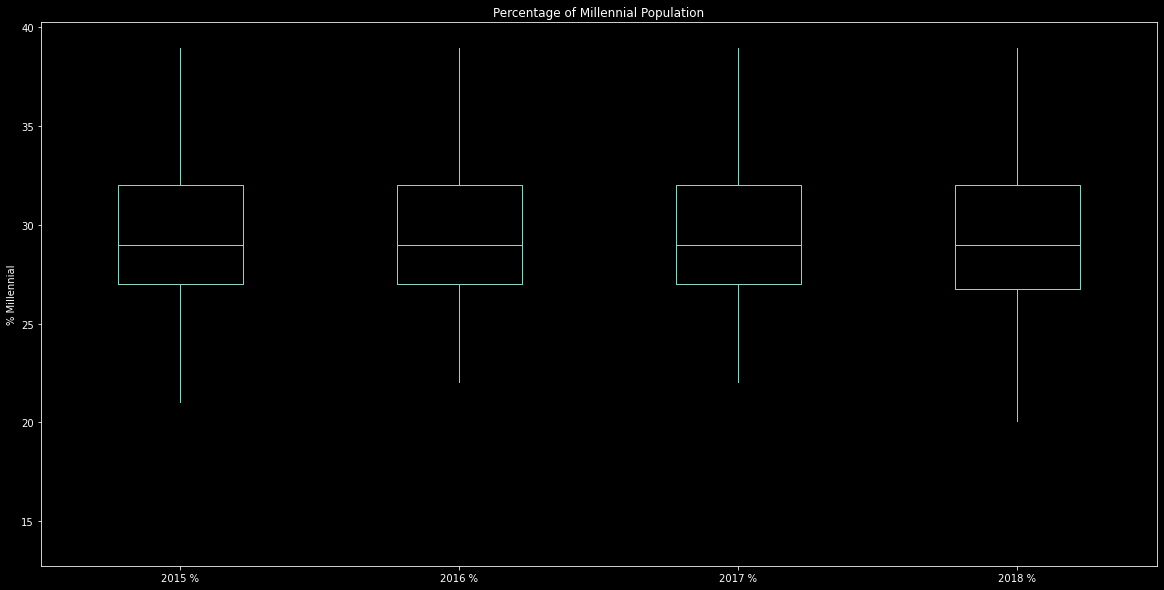

In [641]:
age_clip.boxplot(grid=False)
print(age_clip.describe().reset_index().style.background_gradient(cmap='Greens'))
plt.title('Percentage of Millennial Population')
plt.ylabel('% Millennial')

In [657]:
#describe age stats
age_describe = age_clip[['2015 %', '2016 %', '2017 %', '2018 %']]*100
age_describe = age_describe.describe().reset_index().style.background_gradient(cmap='Greens')
age_describe

,index,2015 %,2016 %,2017 %,2018 %
0,count,40.000000,40.000000,40.000000,40.000000
1,mean,29.621621,29.392396,29.395550,29.414085
2,std,4.176599,4.638996,4.550929,4.237394
3,min,20.699762,14.055425,15.384615,19.989136
4,25%,27.321132,26.897926,26.716520,26.547039
5,50%,28.964273,29.098235,29.213469,28.868874
6,75%,32.107245,32.027127,31.880560,32.109342
7,max,38.933393,39.343232,39.282739,39.435658


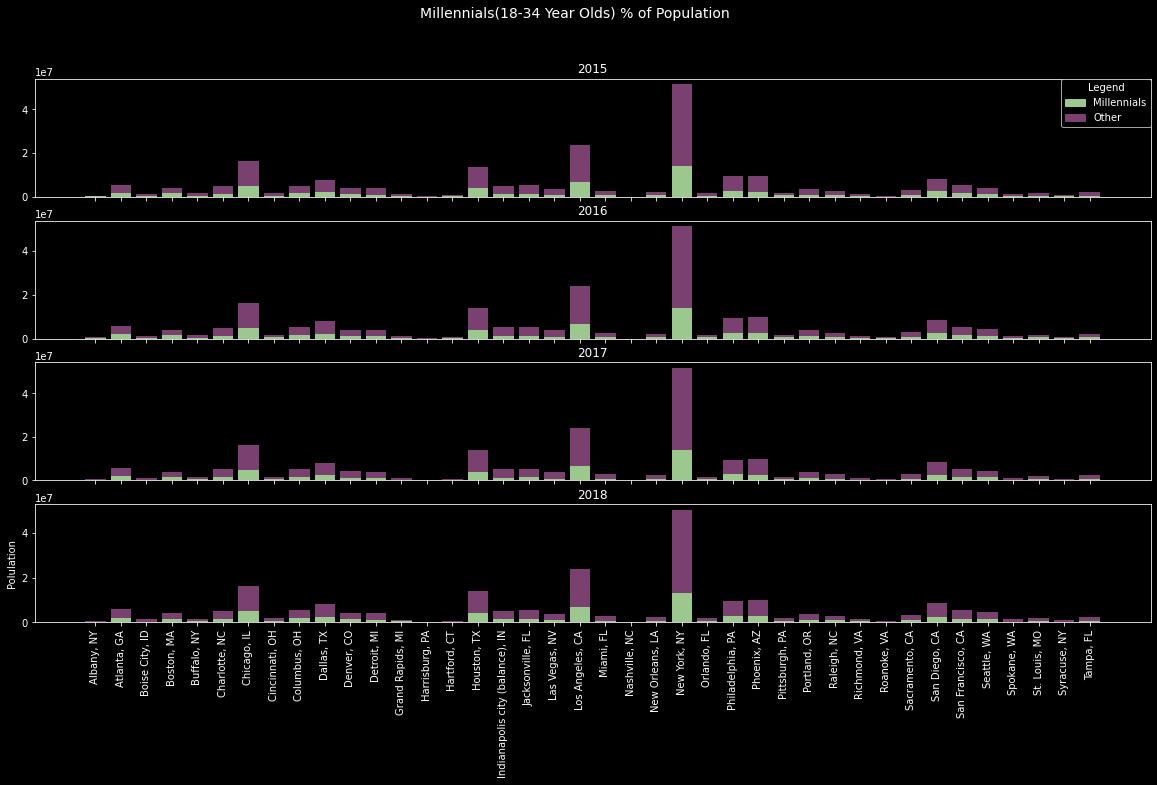

In [522]:
#percentages of age of millenials per city visual
plt.rcParams['figure.figsize']=(20,10)

fig2, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
ax1.bar(age_groupby['City'],age_groupby['2015 Millennials'], color = '#9CC890' )
ax1.bar(age_groupby['City'],age_groupby['2015 Other'], bottom=age_groupby['2015 Millennials'], color='#7A406F')
ax1.set_title('2015')

ax2.bar(age_groupby['City'],age_groupby['2016 Millennials'], color = '#9CC890' )
ax2.bar(age_groupby['City'],age_groupby['2016 Other'], bottom=age_groupby['2016 Millennials'], color='#7A406F')
ax2.set_title('2016')

ax3.bar(age_groupby['City'],age_groupby['2017 Millennials'], color = '#9CC890' )
ax3.bar(age_groupby['City'],age_groupby['2017 Other'], bottom=age_groupby['2017 Millennials'], color='#7A406F')
ax3.set_title('2017')

ax4.bar(age_groupby['City'],age_groupby['2018 Millennials'], color = '#9CC890' )
ax4.bar(age_groupby['City'],age_groupby['2018 Other'], bottom=age_groupby['2018 Millennials'], color='#7A406F')
ax4.set_title('2018')

mil_patch = mpatches.Patch(color='#9CC890', label='Millennials')
non_mil_patch = mpatches.Patch(color='#7A406F', label='Other')
ax1.legend(title='Legend', handles = [mil_patch, non_mil_patch], loc='upper right', fancybox=True, borderaxespad=0)


plt.xticks(rotation=90)
plt.suptitle("Millennials(18-34 Year Olds) % of Population", fontsize=14)
plt.ylabel('Polulation')
plt.show()

In [523]:
#avacado price vs. income analysis
avacado_vs_income = pd.merge(avacado_city, income_data, on=['City', 'Year'], how='left')
avacado_vs_income = avacado_vs_income.loc[avacado_vs_income['Year']<=2018]

avacado_vs_income.drop_duplicates(inplace=True)
avacado_vs_income = avacado_vs_income.groupby(['City', 'Year']).mean().reset_index()
avacado_vs_income


,City,Year,AveragePrice,Median Income
0,"Albany, NY",2015,1.538571,40949.0
1,"Albany, NY",2016,1.521905,42335.0
2,"Albany, NY",2017,1.709180,43790.0
3,"Albany, NY",2018,1.406538,45500.0
4,"Atlanta, GA",2015,1.464909,50210.0
...,...,...,...,...
115,"Syracuse, NY",2018,1.238824,36308.0
116,"Tampa, FL",2015,1.360800,44432.0
117,"Tampa, FL",2016,1.238966,50405.0
118,"Tampa, FL",2017,1.647941,50489.0


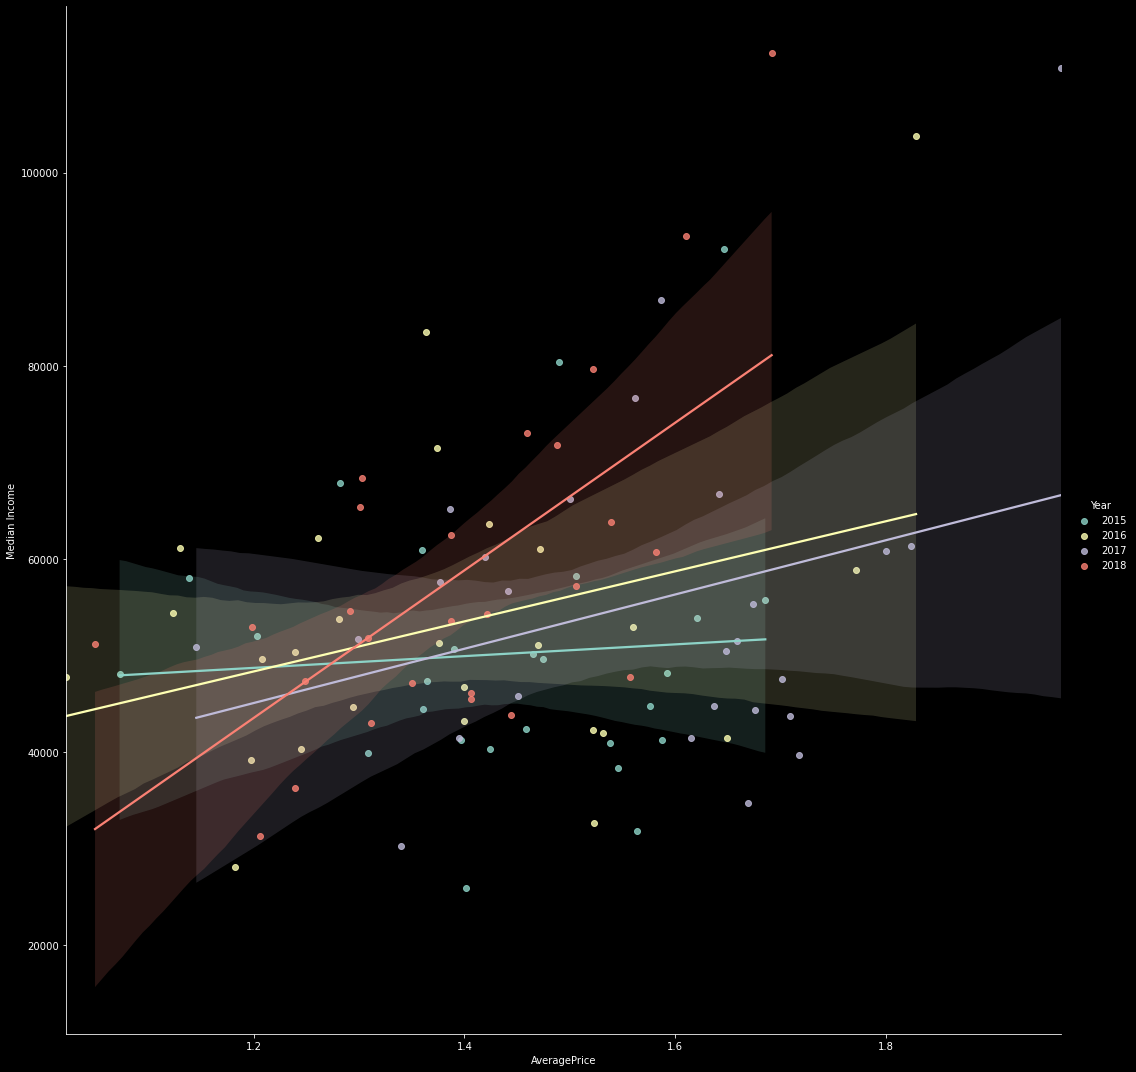

In [574]:
#plot of avacado pice vs. income

sns.lmplot('AveragePrice', 'Median Income', data=avacado_vs_income, hue='Year', size=15)

plt.show()

In [573]:
#regression analysis for avocado price vs. income
for year in years:
    regress_inc = avacado_vs_income.copy()
    regress_inc = regress_inc.loc[regress_inc['Year']== year].dropna()
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(regress_inc['AveragePrice'], regress_inc['Median Income'])
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_squared = rvalue**2
    print('The line equation for {} is {}'.format(year,line_eq))
    print('The r-Squared for {} is {}'.format(year,r_squared))

The line equation for 2015 is y = 6076.81x + 41442.05
The r-Squared for 2015 is 0.004458147154015406
The line equation for 2016 is y = 25900.41x + 17284.68
The r-Squared for 2016 is 0.10472518139494967
The line equation for 2017 is y = 28068.11x + 11416.46
The r-Squared for 2017 is 0.09341235056496099
The line equation for 2018 is y = 76348.44x + -48057.92
The r-Squared for 2018 is 0.4123616254754726


In [526]:
#prep and cleaning for avocado vs age
avacado_vs_age = pd.merge(avacado_city, millennials, on=['City', 'Year'], how='left')
avacado_vs_age = avacado_vs_age.loc[avacado_vs_age['Year']<=2018]
avacado_vs_age = avacado_vs_age[['Year','City', 'Millennials', 'Number in Range','AveragePrice']].rename(columns={'AveragePrice':'Average Price'})
avacado_vs_age.drop_duplicates(inplace=True)
avacado_vs_age = avacado_vs_age.groupby(['City', 'Year', 'Millennials']).mean().reset_index()
avacado_vs_age

,City,Year,Millennials,Number in Range,Average Price
0,"Albany, NY",2015,Millenial,18981.000000,1.538571
1,"Albany, NY",2015,Other,6722.888889,1.538571
2,"Albany, NY",2016,Millenial,19137.000000,1.521905
3,"Albany, NY",2016,Other,6683.444444,1.521905
4,"Albany, NY",2017,Millenial,19083.500000,1.709180
...,...,...,...,...,...
203,"Tampa, FL",2016,Other,30701.666667,1.238966
204,"Tampa, FL",2017,Millenial,51999.500000,1.647941
205,"Tampa, FL",2017,Other,31269.333333,1.647941
206,"Tampa, FL",2018,Millenial,55434.000000,1.290889


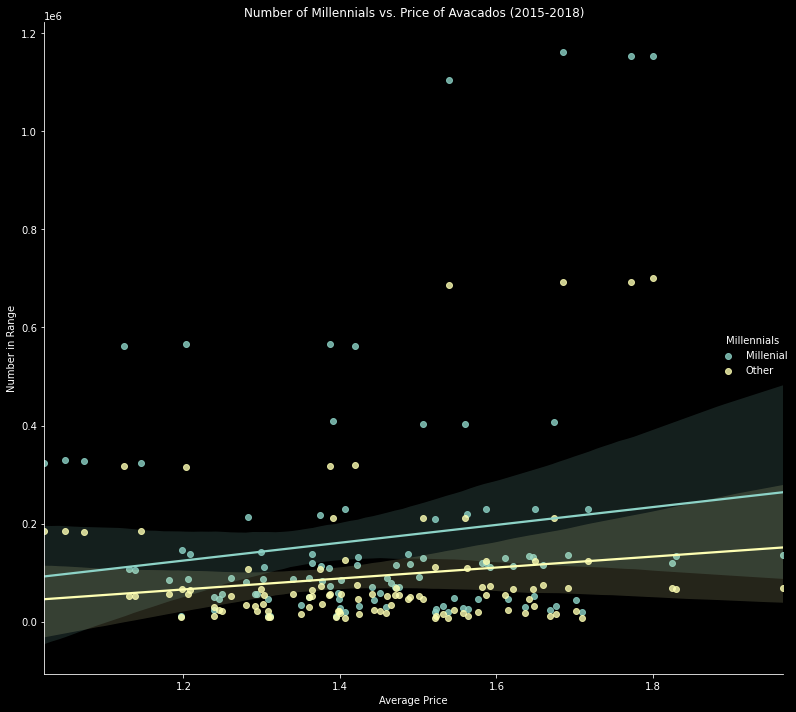

In [616]:
#plot for avocado vs age
sns.lmplot('Average Price', 'Number in Range', data=avacado_vs_age, hue='Millennials', size=10)
plt.title("Number of Millennials vs. Price of Avacados (2015-2018)") 
plt.tight_layout() 

In [528]:
#regression analysis for avocado vs age
mill_list = ['Millenial', 'Other']
for x in mill_list:
    regress_mill = avacado_vs_age.copy()
    regress_mill = regress_mill.loc[regress_mill['Millennials']== x]
    x_values = regress_mill['Average Price']
    y_values = regress_mill['Number in Range']
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_squared = rvalue**2
    print('The line equation for {} is {}'.format(x,line_eq))
    print('The r-Squared for {} is {}'.format(x,r_squared))ds

The line equation for Millenial is y = 181922.13x + -93868.77
The r-Squared for Millenial is 0.021035153654571443
The line equation for Other is y = 111806.21x + -68659.15
The r-Squared for Other is 0.02217732375560323


Normal Test results for 2015 are NormaltestResult(statistic=2.3616669875140075, pvalue=0.3070227303962884)
Normal Test results for 2016 are NormaltestResult(statistic=1.3477011026009929, pvalue=0.50974200627893)
Normal Test results for 2017 are NormaltestResult(statistic=7.937897315517986, pvalue=0.01889328600689197)
Normal Test results for 2018 are NormaltestResult(statistic=0.538641476642707, pvalue=0.7638982049237885)


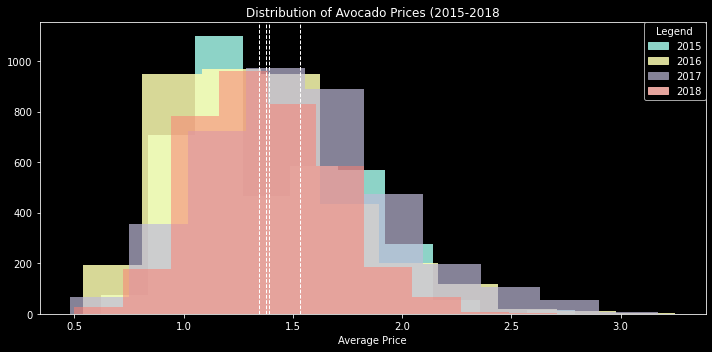

In [658]:
#historgram plot of normal distribution of avocado prices
plt.rcParams['figure.figsize']=(10,5)
alpha=1
for year in years:
    year_data = avacado_data.loc[avacado_data['year']==year]
    plt.hist(year_data['AveragePrice'], alpha =alpha)
    results = sts.normaltest(year_data['AveragePrice'].sample(20))
    plt.axvline(year_data['AveragePrice'].mean(), linestyle='dashed', linewidth=1)
    print('Normal Test results for {} are {}'.format(year, results))
    alpha -=.15

plt.title('Distribution of Avocado Prices (2015-2018')
plt.xlabel('Average Price')
patch_15 = mpatches.Patch(color='#8dd3c7', label='2015')
patch_16 = mpatches.Patch(color='#d7d898', label='2016')
patch_17 = mpatches.Patch(color='#858397', label='2017')
patch_18 = mpatches.Patch(color='#e5a49d', label='2018')
plt.legend(title='Legend', handles = [patch_15, patch_16, patch_17, patch_18], loc='upper right', fancybox=True, borderaxespad=0)
plt.tight_layout()
plt.show()

In [530]:
print(avacado_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18722 entries, 0 to 18721
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18722 non-null  int64  
 1   Date          18722 non-null  object 
 2   AveragePrice  18722 non-null  float64
 3   Total Volume  18722 non-null  float64
 4   4046          18722 non-null  float64
 5   4225          18722 non-null  float64
 6   4770          18722 non-null  float64
 7   Total Bags    18722 non-null  float64
 8   Small Bags    18722 non-null  float64
 9   Large Bags    18722 non-null  float64
 10  XLarge Bags   18722 non-null  float64
 11  type          18722 non-null  object 
 12  year          18722 non-null  int64  
 13  City          18722 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 2.0+ MB
None


In [531]:
avacado_data.head()
avacado_box = avacado_data.loc[avacado_data['year']<= 2018]

Text(0, 0.5, 'Average Price')

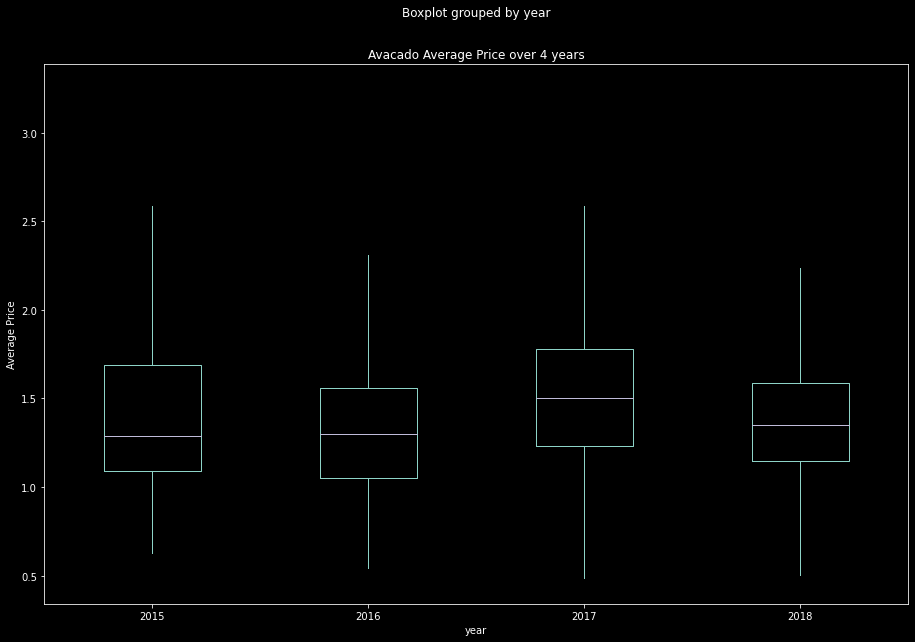

In [532]:
#boxplot of avocado prices
avacado_box.boxplot('AveragePrice', by='year', figsize=(15,10), grid=False, manage_ticks=True, backend='matplotlib', showfliers=True)
plt.title('Avacado Average Price over 4 years')
plt.ylabel('Average Price')

In [626]:
price_summary = avacado_box['AveragePrice'].describe().reset_index()
price_summary.rename(columns={'index': ''})

,,AveragePrice
0,count,15170.000000
1,mean,1.411760
2,std,0.384503
3,min,0.480000
4,25%,1.120000
5,50%,1.370000
6,75%,1.660000
7,max,3.250000
